# Differential metabolic flux analysis

### Introduction

This notebook demonstrates how to perform differential metabolic flux analysis using [scFEA](https://genome.cshlp.org/content/early/2021/07/22/gr.271205.120).<br>
In this tutorial, we use our PMCA Jak2 dataset.

### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 5)
import random
random.seed(123)
import warnings
warnings.filterwarnings("ignore")

### Preparing input data

This analysis uses the expression CPM of enzyme genes as input.

In [2]:
adata = sc.read('data/PMCA_Jak2_raw_count.h5ad')

In [3]:
# Taking CPM
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e6)

In [4]:
# Using only enzyme genes included in the scFEA model
metab_genes = np.genfromtxt('scripts/data/scFEA.mouse.genes.txt', dtype=str)
adata = adata[:,adata.var.index.isin(metab_genes)].copy()

In [5]:
# Saving the input file for scFEA
pd.DataFrame(adata.X.todense(), index=adata.obs.index,
             columns=adata.var.index).T.to_csv('data/PMCA_Jak2_metab_genes_CPM.csv')

### Running scFEA analysis

The main scFEA function can be called from the shell script shown below.<br>
Please provide two arguments as follows:<br>
`!scripts/scFEA.sh [input file] [output directory]`

In [6]:
!scripts/scFEA.sh data/PMCA_Jak2_metab_genes_CPM.csv data/

Calculating MAGIC...
Starting load data...
  Running MAGIC on 40747 cells and 675 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 4.94 seconds.
    Calculating KNN search...
    Calculated KNN search in 225.03 seconds.
    Calculating affinities...
    Calculated affinities in 237.48 seconds.
  Calculated graph and diffusion operator in 467.56 seconds.
  Calculating imputation...
  Calculated imputation in 2.19 seconds.
Calculated MAGIC in 469.81 seconds.
Load compound name file, the balance output will have compound name.
Load data done.
Starting process data...
Process data done.
Starting train neural network...
100%|██████████| 100/100 [9:31:50<00:00, 343.11s/it]
Training time:  34310.88249897957
scFEA job finished. Check result in the desired output folder.


### Visualizing flux estimates

Among the output files of scFEA, the file `Flux.csv` contains the estimated cell-wise metabolic flux values.<br>
The neural network model of scFEA does not necessarily converge to the exact same values as our original analysis. Our precomputed metabolic activities are stored in our processed datasets, which are available at our [PMCA web portal](https://gottgens-lab.stemcells.cam.ac.uk/preleukemia_atlas/).

In [7]:
flux = pd.read_csv('data/Flux.csv',index_col=0)

In [8]:
flux

,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,...,M_162,M_163,M_164,M_165,M_166,M_167,M_168,M_169,M_170,M_171
AAACCTGAGAGCTGGT-1_SLX11516_SIGAC2,0.000977,0.000785,0.012400,2.444722e-09,0.029704,0.020769,0.023290,0.018508,0.001486,0.000294,...,4.610047e-08,0.003986,0.000010,0.002111,1.162291e-06,0.000186,0.024982,2.039596e-07,0.010339,0.019515
AAACCTGAGCCGGTAA-1_SLX11516_SIGAC2,0.000970,0.000722,0.010443,7.860362e-06,0.044896,0.009740,0.024802,0.019225,0.003114,0.000474,...,1.513399e-08,0.004981,0.000094,0.003874,1.429580e-07,0.000161,0.016917,1.920387e-06,0.010620,0.019483
AAACCTGAGGCAAAGA-1_SLX11516_SIGAC2,0.000965,0.000848,0.012923,2.253801e-06,0.028688,0.018721,0.023529,0.018713,0.001638,0.000457,...,5.960464e-08,0.004864,0.000008,0.003050,9.089708e-07,0.000160,0.021694,1.176260e-06,0.010479,0.019665
AAACCTGCAATAGCAA-1_SLX11516_SIGAC2,0.001069,0.000832,0.011873,1.834706e-06,0.037026,0.016729,0.024361,0.023079,0.002169,0.000606,...,5.308539e-08,0.004795,0.000010,0.004360,9.983778e-07,0.000157,0.021310,4.656613e-08,0.010500,0.019648
AAACCTGCAATGTTGC-1_SLX11516_SIGAC2,0.000985,0.000818,0.011947,2.505258e-07,0.029459,0.014576,0.023236,0.018053,0.001213,0.000404,...,3.306195e-08,0.004023,0.000028,0.002460,8.028001e-07,0.000206,0.022814,2.961606e-07,0.010382,0.019503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTTACCAGT-1_SLX12969_SIGAB8,0.000969,0.000744,0.010621,5.515292e-06,0.042395,0.010153,0.024614,0.020262,0.003080,0.000434,...,8.149073e-09,0.004951,0.000120,0.003691,1.145527e-07,0.000179,0.017142,1.084991e-07,0.010577,0.019281
TTTGTCATCAGAGCTT-1_SLX12969_SIGAB8,0.000999,0.000912,0.011363,1.071393e-05,0.045906,0.013582,0.024964,0.022536,0.003085,0.000557,...,1.955777e-08,0.005040,0.000068,0.003960,1.769513e-07,0.000138,0.018612,3.285706e-06,0.010681,0.019559
TTTGTCATCCCAGGTG-1_SLX12969_SIGAB8,0.001027,0.000844,0.014203,-1.601875e-07,0.028513,0.018204,0.022629,0.017807,0.000555,0.000198,...,9.546056e-09,0.003861,0.000003,0.002742,1.505017e-06,0.000226,0.026535,-1.685694e-06,0.010415,0.019229
TTTGTCATCGGCGCAT-1_SLX12969_SIGAB8,0.001005,0.000977,0.014320,2.910383e-11,0.027758,0.016221,0.023306,0.020684,0.000754,0.000290,...,1.746230e-10,0.004152,0.000014,0.003075,8.102506e-07,0.000140,0.024399,7.217750e-07,0.010428,0.019471


Metadata for the metabolic reactions is provided in the "scripts/data" directory

In [9]:
reaction_metadata = pd.read_csv('scripts/data/scFEA.M171.mouse.moduleinfo.csv',index_col=0)

In [10]:
reaction_metadata

,M_name,C_in,C_in_name,C_out,C_out_name,Supermodule_id,SM_anno
M_id,,,,,,,
M_1,Glucose_G6P,Glucose,C00267,G6P,C00668,1,Glycolysis_TCA_cycle
M_2,G6P_G3P,G6P,C00668,G3P,C00118,1,Glycolysis_TCA_cycle
M_3,G3P_3PD,G3P,C00118,3PD,C00197,1,Glycolysis_TCA_cycle
M_4,3PD_Pyruvate,3PD,C00197,Pyruvate,C00022,1,Glycolysis_TCA_cycle
M_5,Pyruvate_Acetyl-Coa,Pyruvate,C00022,Acetyl-Coa,C00024,1,Glycolysis_TCA_cycle
...,...,...,...,...,...,...,...
M_167,"(E,E)-Farnesyl-PP_Cholesterol","(E,E)-Farnesyl-PP",C00448,Cholesterol,C00187,22,Steroid_hormone_synthesis
M_168,Cholesterol_Chenodeoxycholate,Cholesterol,C00187,Chenodeoxycholate,C02528,22,Steroid_hormone_synthesis
M_169,Cholesterol_ Steroid_hormone,Cholesterol,C00187,Steroid_hormone,CC0003,22,Steroid_hormone_synthesis


In [11]:
adata.obs = pd.concat([adata.obs, flux], axis=1)

M_11: Succinate_Fumarate


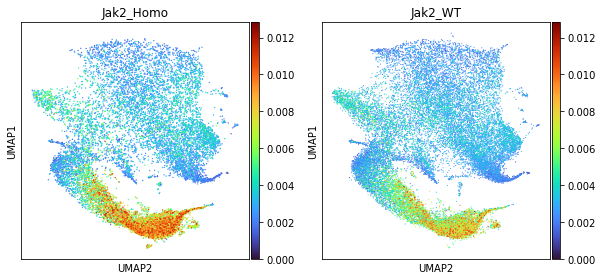

In [12]:
nrow, ncol = 1, 2
fig, ax = plt.subplots(nrow,ncol, figsize=(8.5,4), sharex=True, sharey=True)

Condition_unique = ['Jak2_Homo','Jak2_WT']
flux_id = 'M_11'
print(flux_id+': '+reaction_metadata['M_name'][flux_id])

vmax = float(max(adata.obs[flux_id]))
for i in range(len(Condition_unique)):
    colidx = i%ncol
    ax1 = sc.pl.umap(adata[adata.obs['Condition'] == Condition_unique[i]], 
                     title=Condition_unique[i], color=flux_id, 
                     components=['2,1'],
                     ax=ax[colidx], 
                     vmax=vmax,vmin=0,
                     cmap='turbo',
                     #s=30,
                     show=False)
plt.tight_layout() 

### Statistical comparison of mutant and wild-type metabolic activities

In [13]:
# Saving the metadata for statistical comparison
adata.obs[['dataset','Condition','celltype']].to_csv('data/metadata_for_LR.csv')

Running differential metabolic flux analysis. When you analyze your own data, please change the "params" section within the R script.

In [14]:
!R --vanilla --slave < scripts/scFEA_LR.R

Attaching SeuratObject
Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat
Analysis completed


### Volcano plot

In [15]:
adata_flux = AnnData(X=flux, obs = adata.obs[['Condition','celltype']])

In [16]:
def cohens_d(x, y):
    pooled_std = np.sqrt(((len(x)-1) * np.var(x, ddof=1) 
                          + (len(y)-1) * np.var(y, ddof=1)) / 
                             (len(x) + len(y) - 2))
    return (np.mean(x) - np.mean(y)) / pooled_std

In [17]:
##############################################
# params
celltype_to_plot = 'MEP'
test_cond = 'Jak2_Homo'
ctrl_cond = 'Jak2_WT'

##############################################
# Preparing the data matrix
LR_results = pd.read_csv('data/PMCA_Jak2_'+celltype_to_plot+'_metab_'+test_cond+'_vs_'+ctrl_cond+'.csv',index_col=0)
LR_results.index = [idx.replace("-", "_") for idx in LR_results.index]

adata_flux_for_volcano = adata_flux[adata_flux.obs['celltype']==celltype_to_plot,:].copy()
sc.pp.log1p(adata_flux_for_volcano)
test_cells = adata_flux_for_volcano.obs.index[adata_flux_for_volcano.obs['Condition'] == test_cond]
ctrl_cells = adata_flux_for_volcano.obs.index[adata_flux_for_volcano.obs['Condition'] == ctrl_cond]

df = pd.DataFrame(adata_flux_for_volcano.X.T,
                  index = adata_flux_for_volcano.var.index,
                  columns=adata_flux_for_volcano.obs.index)

test_df = df.loc[:,test_cells]
ctrl_df = df.loc[:,ctrl_cells]

for flux_id in LR_results.index:
    A, B = test_df.loc[flux_id].to_numpy().ravel(), ctrl_df.loc[flux_id].to_numpy().ravel()
    c_d = cohens_d(A, B)
    LR_results.loc[flux_id, ['cohens_d']] = c_d

LR_results.index.name = 'M_id'

In [18]:
LR_results = LR_results.merge(reaction_metadata, how='left',left_on='M_id', right_index=True)

In [19]:
# Annotated statistical results
LR_results

,p_val,p_val_adj,cohens_d,M_name,C_in,C_in_name,C_out,C_out_name,Supermodule_id,SM_anno
M_id,,,,,,,,,,
M_167,6.474570e-10,9.323380e-08,-0.397279,"(E,E)-Farnesyl-PP_Cholesterol","(E,E)-Farnesyl-PP",C00448,Cholesterol,C00187,22,Steroid_hormone_synthesis
M_143,2.007160e-09,2.890310e-07,0.396856,IMP_Hypoxanthine,IMP,C00130,Hypoxanthine,C00262,20,Purine_synthesis
M_8,2.602837e-09,3.748086e-07,0.373187,Citrate_2OG,Citrate,C00158,2OG,C00026,1,Glycolysis_TCA_cycle
M_157,3.660615e-09,5.271285e-07,0.393023,CDP_dCDP,CDP,C00112,dCDP,C00705,21,Pyrimidine_synthesis
M_170,3.915621e-09,5.638495e-07,0.367954,XMP_GMP,XMP,C00655,GMP,C00144,20,Purine_synthesis
...,...,...,...,...,...,...,...,...,...,...
M_90,9.118041e-01,1.000000e+00,0.009690,Propanoyl-CoA_in_Propanoyl-CoA,Propanoyl-CoA_in,C00000,Propanoyl-CoA,C00100,12,Transporters
M_96,9.162580e-01,1.000000e+00,0.011250,Valine_in_Valine,Valine_in,C00000,Valine,C00183,12,Transporters
M_58,9.633203e-01,1.000000e+00,-0.005374,Tyrosine_Tyrosine-OUT,Tyrosine,C00082,Tyrosine-OUT,C00000,9,BCAA_metabolism


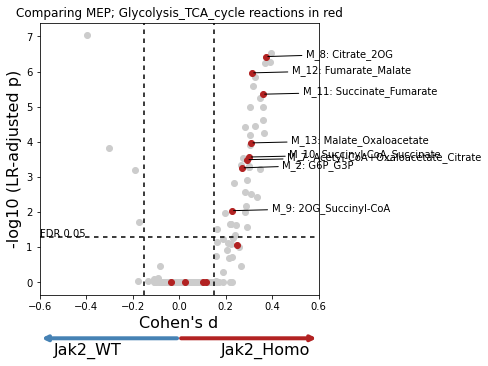

In [20]:
############################################
# params
SM='Glycolysis_TCA_cycle' # super module
data = LR_results
c1='#b22222' # color for the specified super module
c2="#CCCCCC" # color for the other modules
annotate=True
cohen_thr = 0.15

############################################
# Generating a volcano plot
plt.figure(figsize=(5,5))
axs = plt.gca()
data['p_val_adj'][data['p_val_adj']<1e-300]=1e-300
data_1 = data[data['SM_anno']==SM]
data_2 = data[data['SM_anno']!=SM]

axs.scatter(data_2['cohens_d'], -np.log10(data_2['p_val_adj']), c=c2)
axs.scatter(data_1['cohens_d'], -np.log10(data_1['p_val_adj']), c=c1)
axs.set_xlabel("Cohen's d", fontsize=16)
axs.set_ylabel("-log10 (LR-adjusted p)", fontsize=16)

x_lim = np.max([np.abs(data['cohens_d']).max(),0.6])
axs.set_xlim(-x_lim, x_lim)
axs.axvline(-cohen_thr, dashes=(3,3), c='black')
axs.axvline(cohen_thr, dashes=(3,3), c='black')
axs.axhline(-np.log10(0.05), dashes=(3,3), c='black')
axs.annotate('FDR 0.05', xy=(-x_lim, -np.log10(0.05)), fontsize=10)

title = 'Comparing '+celltype_to_plot+'; '+SM+' reactions in red'
axs.set_title(title, fontdict={'fontsize':12})
axs.annotate('', xy=(0.5, -0.16), xycoords='axes fraction', xytext=(0, -0.16),
             arrowprops=dict(arrowstyle="<-", color='#4682B4', linewidth=4))
axs.annotate(test_cond, xy=(0.65, -0.22), xycoords='axes fraction', fontsize=16)
axs.annotate('', xy=(0.5, -0.16), xycoords='axes fraction', xytext=(1, -0.16),
             arrowprops=dict(arrowstyle="<-", color='#b22222', linewidth=4))
axs.annotate(ctrl_cond, xy=(0.05, -0.22), xycoords='axes fraction', fontsize=16)

labeled_reactions = data_1.index[(data_1['p_val_adj']<0.05) & (abs(data_1['cohens_d'])>cohen_thr)]
if annotate:
    for r in data.index:
        if r in labeled_reactions:
            x = data.loc[r, 'cohens_d']
            y = -np.log10(data.loc[r, 'p_val_adj'])
            offset = (40, 0)
            if x < 0:
                offset = (-120, -20)
            axs.annotate(str(r)+': '+str(data.loc[r,'M_name']), (x,y), 
                         xytext = offset,textcoords='offset pixels', 
                         arrowprops={'arrowstyle':"-"})


axs.grid(False)